In [1]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
arq = [
    '../08-busca-global/tarefa',
    '../07-busca-local/tarefa2',
]

txt = [
    './in-aula.txt',
    './in1.txt',
    './in2.txt',
    './in3.txt',
    './in4.txt',
    './in5.txt'
]

In [3]:
def exec_program(exec, arquive):
    with open(f'{arquive}') as f:
        entry = f.read()
        start = time.perf_counter()
        proc = subprocess.run([exec], input= entry ,text=True, capture_output=True)
        end = time.perf_counter()

    entry = entry.split()
    variaveis = {"N": entry[0], "Peso": entry[1]}
   
    # print('Saída:', proc.stdout)
    # print('Stderr:', proc.stderr)
    # print('Tempo total(s):', end - start)
    if proc.stderr:
        raise Exception("Algo deu errado")
    std = proc.stdout
    stdout = std.split()
    results = {'peso': stdout[0], 'valor': stdout[1], 'itens': stdout[3:]}
    
    return variaveis, results, (end - start)
    

In [4]:
exec_program('../08-busca-global/tarefa2','./in4.txt')

({'N': '5', 'Peso': '10'},
 {'peso': '0', 'valor': '55', 'itens': []},
 0.01070959703065455)

In [5]:
def arquivo_pandas(exec, txts):
    results = []
    for i in txts:
        exec_prog_exit = exec_program(exec, i)
        results.append(exec_prog_exit)

    df = pd.DataFrame()
    df['N'] = [i[0]["N"] for i in results]
    df['valor'] = [i[1]["valor"] for i in results]
    df['Tempo'] = [i[2]for i in results]

    return df

In [6]:
arq[0]

'../08-busca-global/tarefa'

In [7]:
local = arquivo_pandas(arq[1], txt)


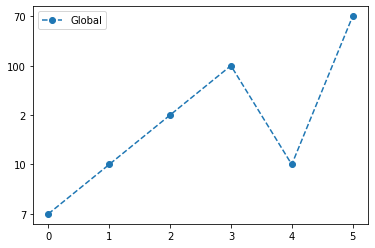

In [8]:
plt.plot(local['valor'], 'o--', label='Global')
# plt.plot(Local['valor'], 'o--', label='Local')
# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.show()
